In [1]:
import time
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from umap_ import *
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objects as go
#import xlsxwriter


sns.set(style='darkgrid', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.51.2-dppy0.10.0-3.gbfbd2eeae.dirty (/glob/development-tools/versions/oneapi/beta10/inteloneapi/intelpython/python3.7/lib/python3.7/site-packages), Requirement.parse('numba<0.52,>=0.51.2')))'.
  numba.core.entrypoints.init_all()


In [2]:
%%time
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd

from seirsplus.models import *
from seirsplus.networks import *
import networkx
sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


CPU times: user 10.5 ms, sys: 4.69 ms, total: 15.2 ms
Wall time: 87.6 ms


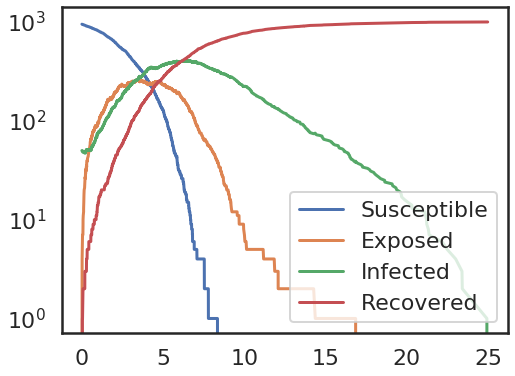

In [4]:
##Trial for characterization
s = 1000
arr = [int(s/2), int(s/2)]
c_arr = [[1,1],[1,15]]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=1.4)


r = np.random.RandomState(10)

coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)


#repeat
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

H1 = nx.DiGraph()
H1.add_node('S')
H1.add_edge('E', 'I', rate = 0.7)
H1.add_edge('I', 'R', rate = 0.3)

J1 = nx.DiGraph()
J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='weight')
IC = defaultdict(lambda: 'S')
for node in range(50):
    IC[node] = 'I'
    
return_statuses = ('S', 'E', 'I', 'R')

t, S, E, I, R = EoN.Gillespie_simple_contagion(G1, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

plt.semilogy(t, S, label = 'Susceptible')
plt.semilogy(t, E, label = 'Exposed')
plt.semilogy(t, I, label = 'Infected')
plt.semilogy(t, R, label = 'Recovered')
plt.legend()

df =pd.DataFrame(list(zip(t,S,E,I,R)), columns =['t','S','E','I','R'])




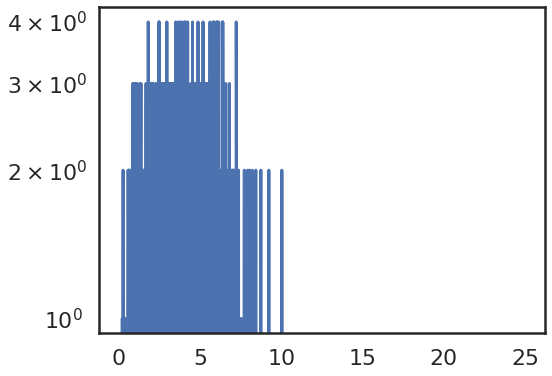

In [12]:
p= I[0]
I1= [0,0,0]
for i in range(3,len(I)):
    new = I[i]-p
    I1.append(new)
    p= I[i-3]
plt.semilogy(t, I1, label = 'Infected der')


In [36]:
def derivative(s, c_arr, sdv,n):
    ##Trial for characterization
    print([s,c_arr, sdv, n])
    #s = 1000
    arr = [int(s/2), int(s/2)]
    #c_arr = [[1,1],[1,15]]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sdv)


    r = np.random.RandomState(10)

    coo_matrix1 = umap.fuzzy_simplicial_set(data,n,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)


#repeat
    sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

    H1 = nx.DiGraph()
    H1.add_node('S')
    H1.add_edge('E', 'I', rate = 0.7)
    H1.add_edge('I', 'R', rate = 0.3)

    J1 = nx.DiGraph()
    J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='weight')
    IC = defaultdict(lambda: 'S')
    for node in range(50):
        IC[node] = 'I'
    
    return_statuses = ('S', 'E', 'I', 'R')

    t, S, E, I, R = EoN.Gillespie_simple_contagion(G1, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

    #plt.semilogy(t, S, label = 'Susceptible')
    #plt.semilogy(t, E, label = 'Exposed')
    #plt.semilogy(t, I, label = 'Infected')
    #plt.semilogy(t, R, label = 'Recovered')
    #plt.legend()

    #df =pd.DataFrame(list(zip(t,S,E,I,R)), columns =['t','S','E','I','R'])

    p= I[0]
    I1= [0,0,0]
    for i in range(3,len(I)):
        new = I[i]-p
        I1.append(new)
        p= I[i-3]
        
    return I1
    #plt.plot(t, I1, label = 'Infected der')


In [52]:
def der(I):
    p= I[0]
    I1= [0,0,0]
    for i in range(3,len(I)):
        new = I[i]-p
        I1.append(new)
        p= I[i-3]
    return I1

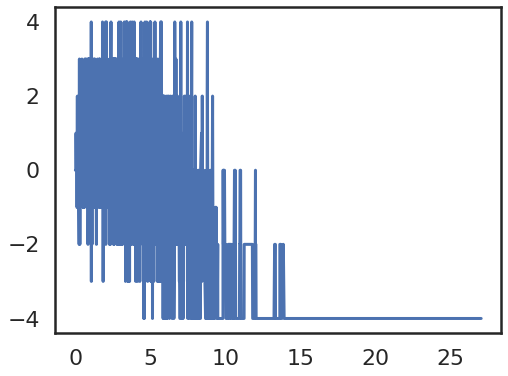

In [26]:
derivative(1000,[[1,1],[1,15]], 1, 30)

In [53]:
Id =[]
for i in range(6):
    Id.append(derivative(1000,[[1,1],[1,(4*i+5)]], 1, 30))


[1000, [[1, 1], [1, 5]], 1, 30]
[1000, [[1, 1], [1, 9]], 1, 30]
[1000, [[1, 1], [1, 13]], 1, 30]
[1000, [[1, 1], [1, 17]], 1, 30]
[1000, [[1, 1], [1, 21]], 1, 30]
[1000, [[1, 1], [1, 25]], 1, 30]


In [59]:
len(Id[3])

2901

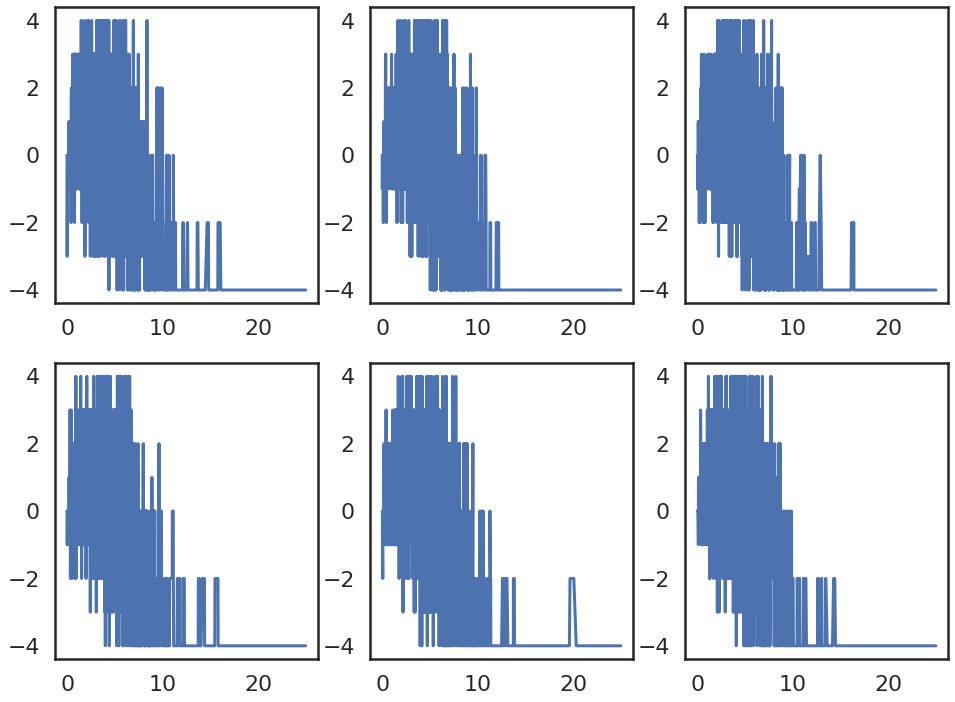

In [62]:
fig, axs = plt.subplots(2, 3,figsize=((16,12)))
for i in range(2):
    for j in range(3):
        axs[i,j].plot(t,Id[(3*i+j)])
        

In [68]:
def ipfn(s,c_arr, sd, n_neighbors ):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
    print([s,c_arr, sd, n_neighbors])
    i=n_neighbors
    arr = [int(s/2), int(s/2)]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sd)
    plt.scatter(data[:,0],data[:,1], c=y, cmap = 'viridis')
    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
    
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.4, initI = s*0.1)
    
    model_base.run(T=300)
    fig,axs =model_base.figure_basic(ylim=0.5,xlim=100)
    return fig,axs
    

[1000, [[1, 0], [1, 10]], 1.4, 10]
t = 0.04
t = 10.01
t = 20.02
t = 30.00
t = 40.06
t = 50.13
t = 60.00
t = 70.16


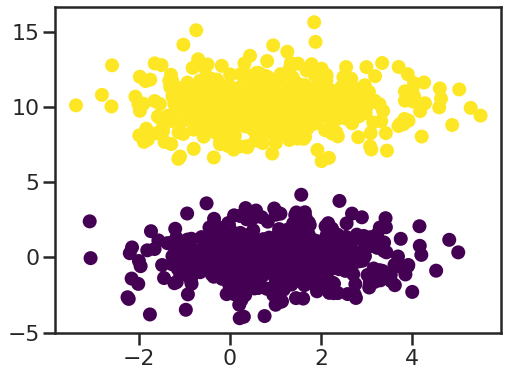

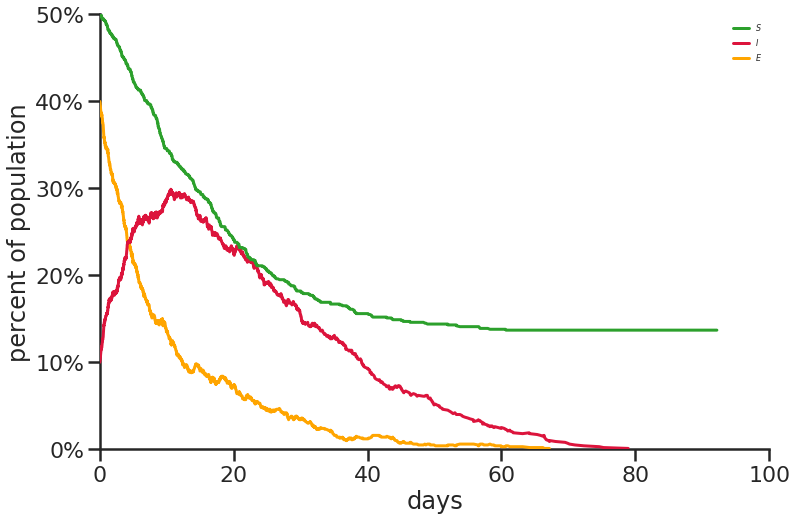

In [125]:
fig,axs = ipfn(1000, [[1,0],[1,10]], 1.4, 10)

In [130]:
line1 = axs.lines[1]
p1 = line1.get_data()

In [146]:
p[0][np.argmax(p1[1])]


9.531955485208144

[1000, [[1, 0], [1, 5]], 1.4, 10]
t = 0.00
t = 10.02
t = 20.03
t = 30.01
t = 40.07
t = 50.18
t = 60.69


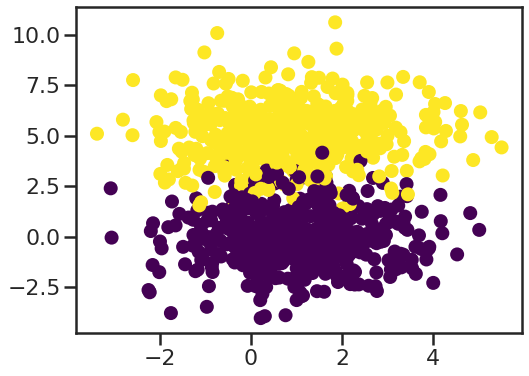

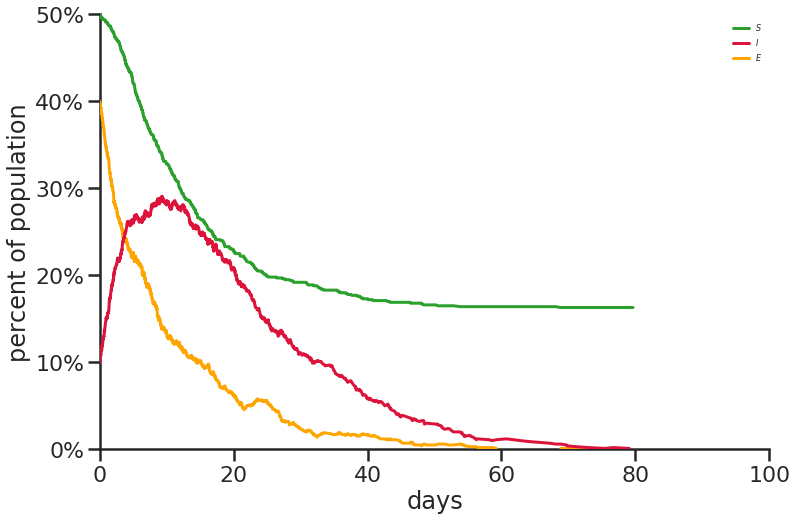

In [122]:
fig,axs = ipfn(1000, [[1,0],[1,5]], 1.4, 10)

In [123]:
line = axs.lines[1]
p = line.get_data()

In [124]:
np.argmax(p[1])



816

In [140]:
max(p1[0])

78.9353198971051

In [145]:
axs.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1b295377d0>)

In [3]:
def ipfn(s,c_arr, sd, n_neighbors,loop ):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
    print([s,c_arr, sd, n_neighbors])
    h=loop
    i=n_neighbors
    arr = [int(s/2), int(s/2)]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sd)
    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
    
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.4, initI = s*0.1)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic(ylim=0.5,xlim=100)
    
    line = axs.lines[1]
    p = line.get_data()
    m = max(p[1])
    d = p[0][np.argmax(p[1])]
    return m,d
    
    

[1000, [[1, 1], [1, 5]], 1, 30]
t = 0.00
t = 10.05
t = 20.01
t = 30.02
t = 40.00
t = 50.53
t = 60.04
t = 70.33
t = 90.56
t = 150.39


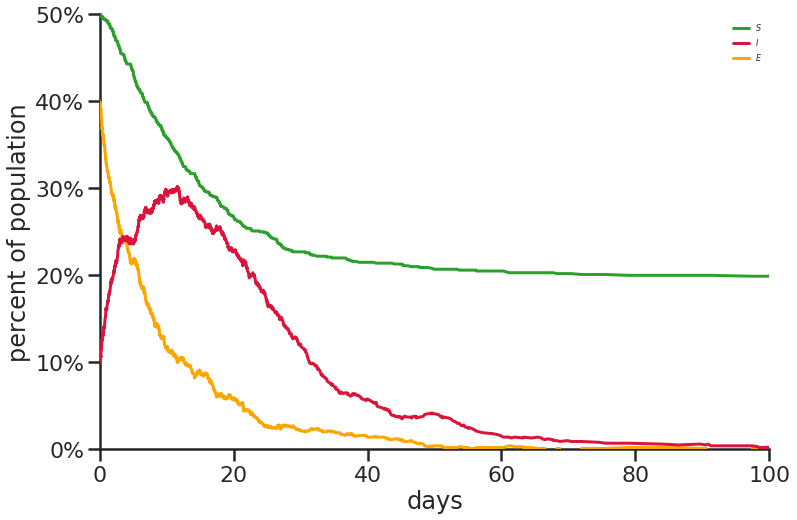

[1000, [[1, 1], [1, 5]], 2, 30]
t = 0.01
t = 10.03
t = 20.05
t = 30.10
t = 40.11
t = 50.36


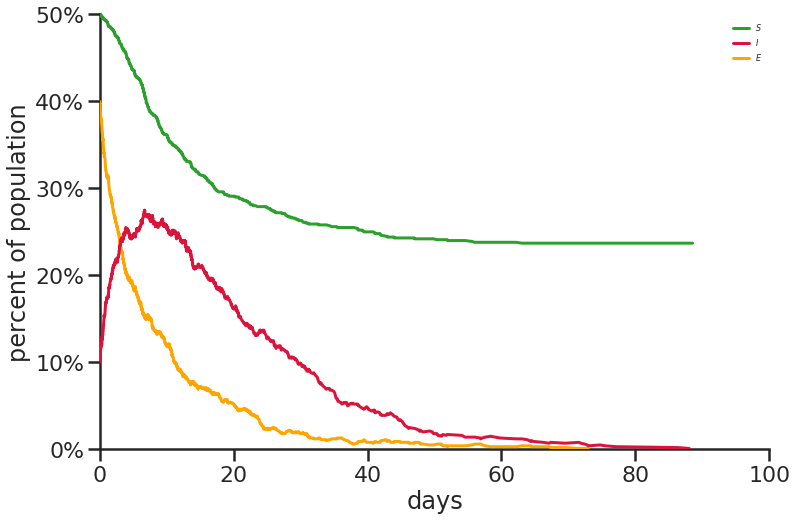

[1000, [[1, 1], [1, 5]], 3, 30]
t = 0.00
t = 10.00
t = 20.01
t = 30.04
t = 40.15
t = 50.07
t = 60.13
t = 70.05


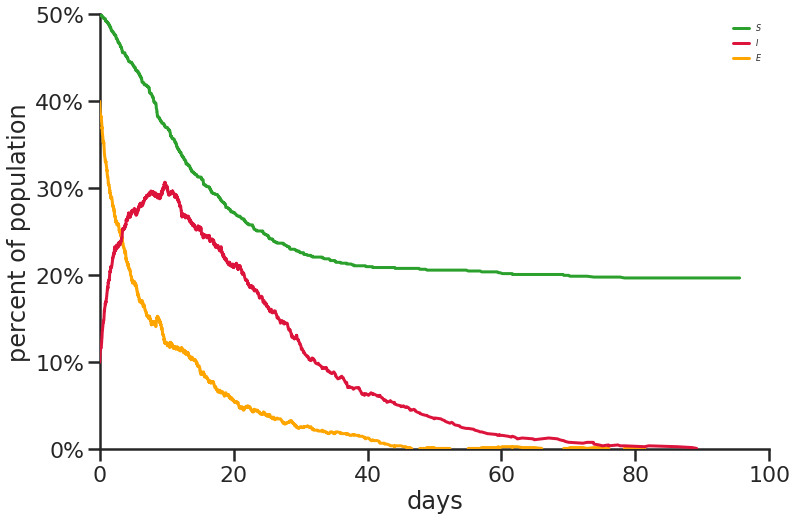

[1000, [[1, 1], [1, 5]], 4, 30]
t = 0.00
t = 10.00
t = 20.00
t = 30.01
t = 40.03
t = 50.03
t = 60.18
t = 70.50


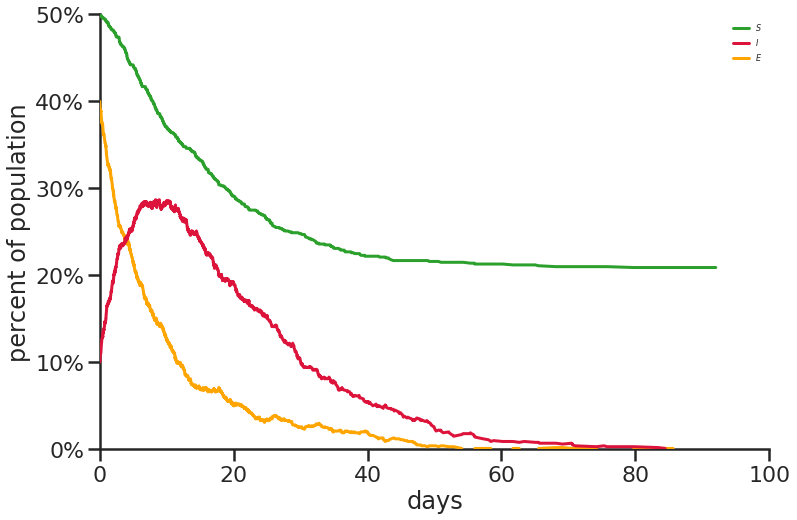

[1000, [[1, 1], [1, 5]], 5, 30]
t = 0.04
t = 10.01
t = 20.00
t = 30.03
t = 40.14
t = 50.07
t = 60.41
t = 110.03


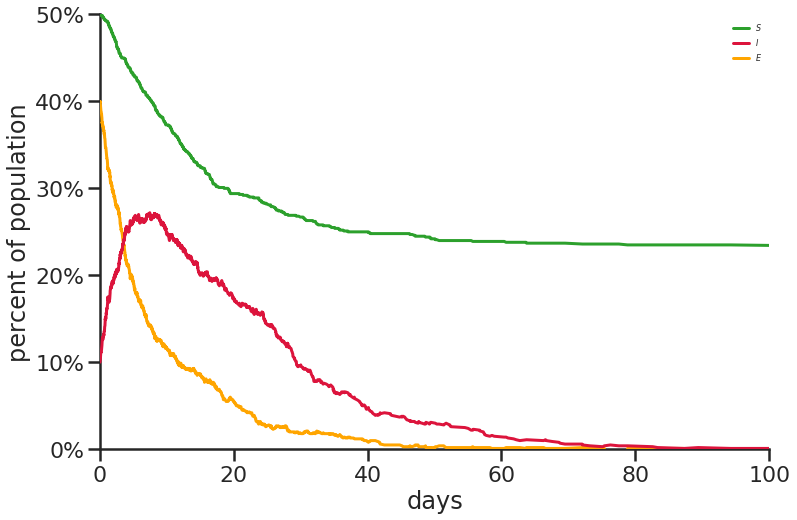

[1000, [[1, 1], [1, 5]], 6, 30]
t = 0.02
t = 10.01
t = 20.05
t = 30.00
t = 40.10
t = 50.09
t = 60.90
t = 70.64
t = 80.95
t = 90.31


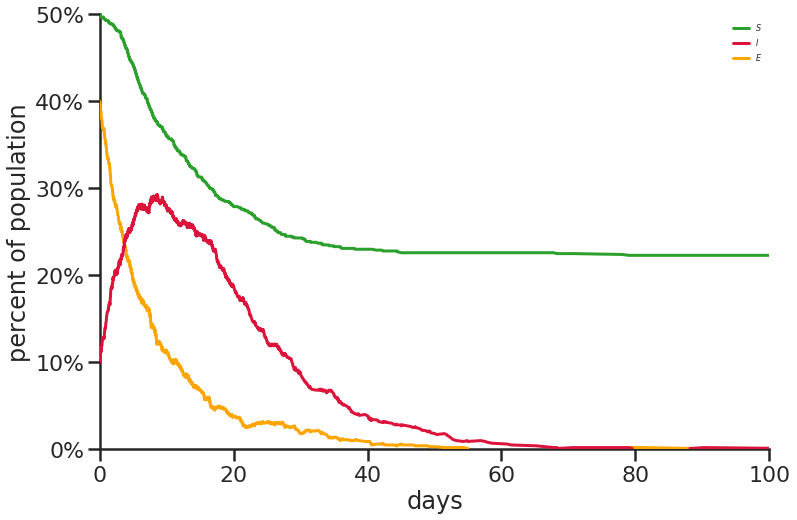

[1000, [[1, 1], [1, 9]], 1, 30]
t = 0.01
t = 10.02
t = 20.00
t = 30.04
t = 40.02
t = 50.33
t = 60.34
t = 70.08
t = 80.11


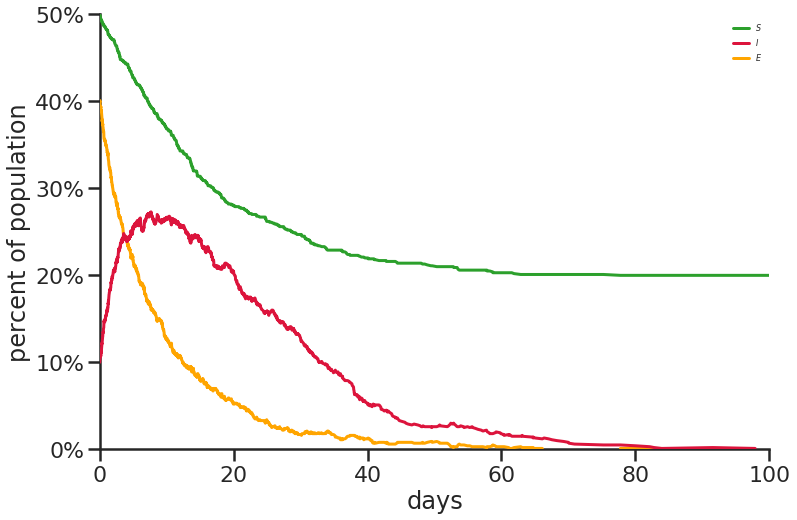

[1000, [[1, 1], [1, 9]], 2, 30]
t = 0.01
t = 10.01
t = 20.02
t = 30.12
t = 40.02
t = 50.14
t = 70.90


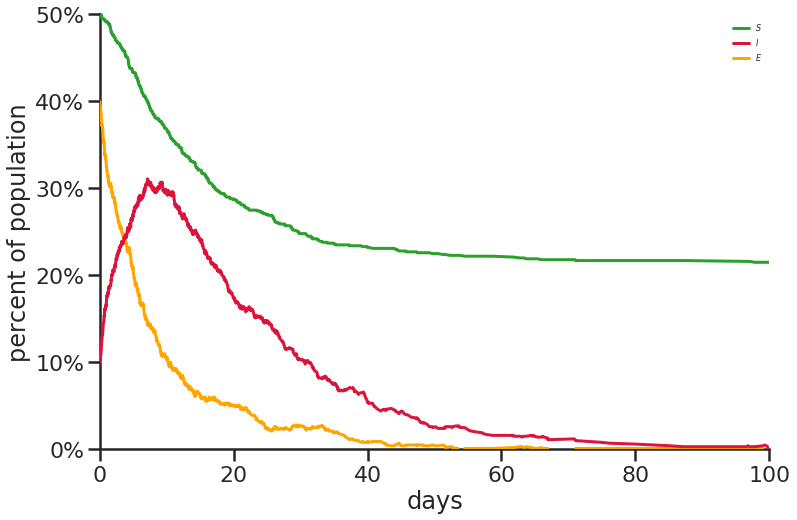

[1000, [[1, 1], [1, 9]], 3, 30]
t = 0.00
t = 10.03
t = 20.04
t = 30.02
t = 40.07
t = 50.18
t = 70.86


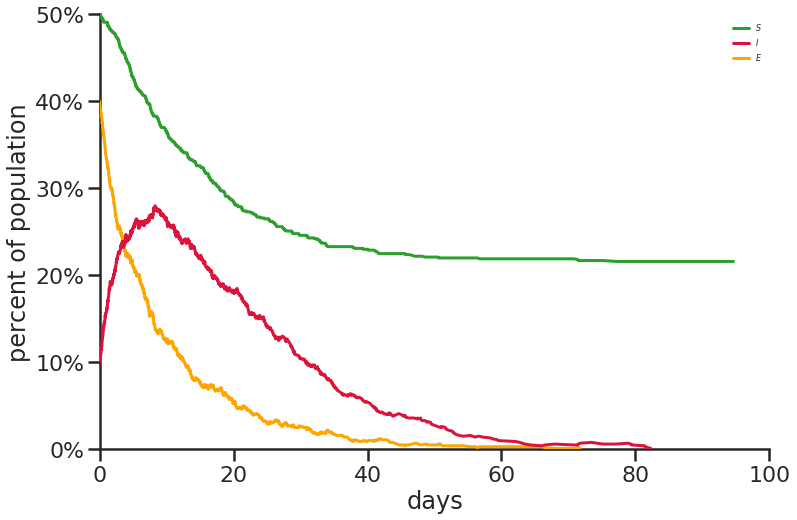

[1000, [[1, 1], [1, 9]], 4, 30]
t = 0.01
t = 10.02
t = 20.03
t = 30.06
t = 40.03
t = 50.27
t = 60.29
t = 110.95


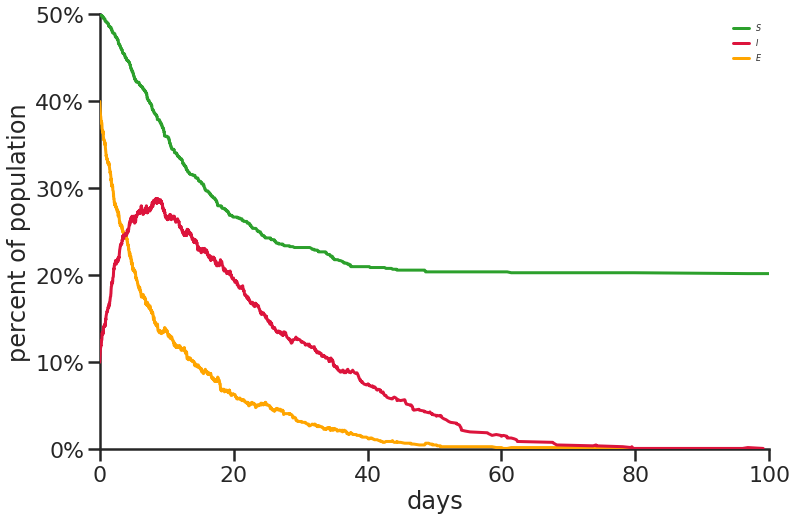

[1000, [[1, 1], [1, 9]], 5, 30]
t = 0.00
t = 10.02
t = 20.02
t = 30.01
t = 40.01
t = 50.44
t = 70.28


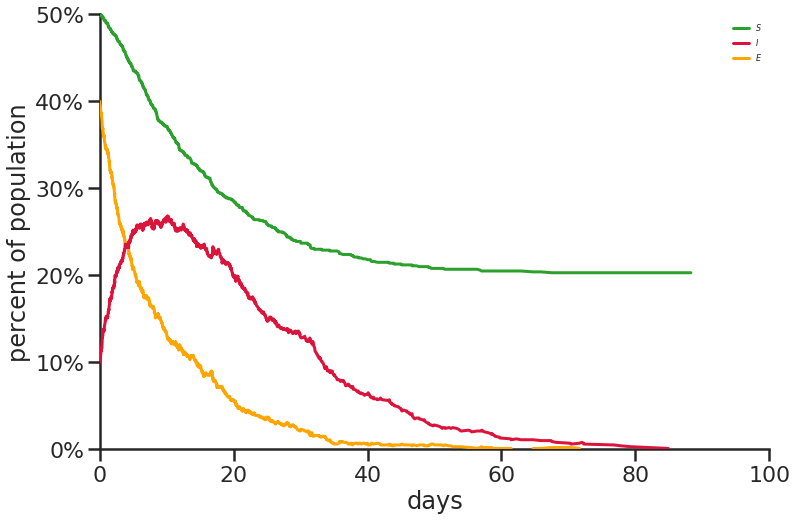

[1000, [[1, 1], [1, 9]], 6, 30]
t = 0.01
t = 10.01
t = 20.05
t = 30.04
t = 40.02
t = 50.02
t = 70.19


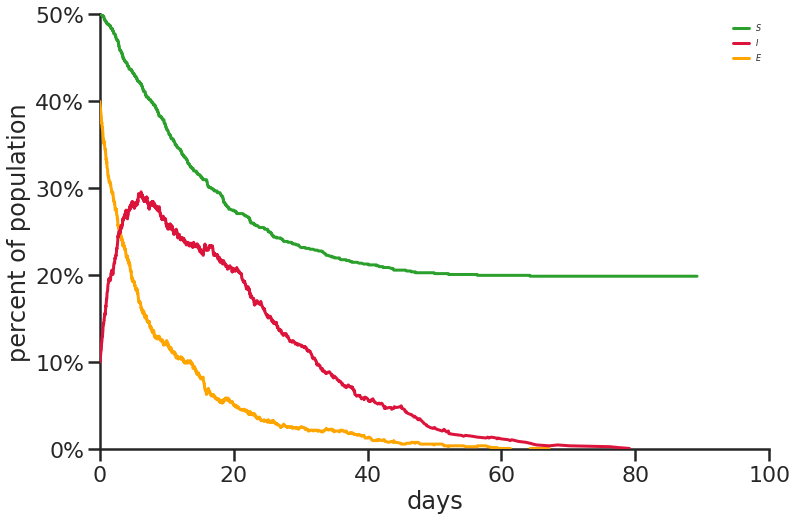

[1000, [[1, 1], [1, 13]], 1, 30]
t = 0.01
t = 10.03
t = 20.01
t = 30.07
t = 40.09
t = 50.04
t = 60.12


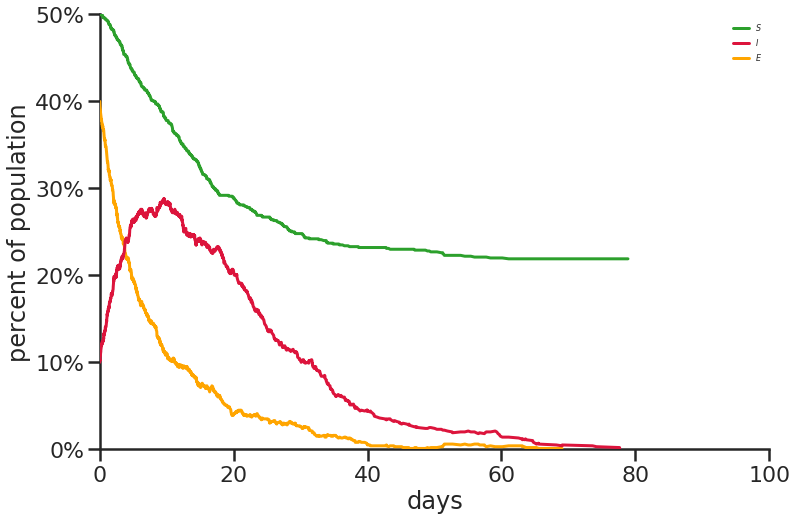

[1000, [[1, 1], [1, 13]], 2, 30]
t = 0.00
t = 10.00
t = 20.08
t = 30.02
t = 40.03
t = 50.22
t = 60.78
t = 80.86


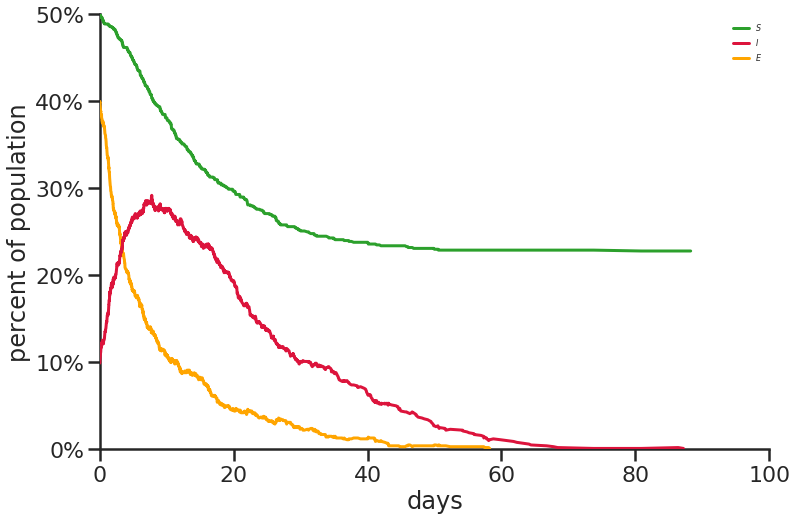

[1000, [[1, 1], [1, 13]], 3, 30]
t = 0.01
t = 10.01
t = 20.04
t = 30.04
t = 40.09
t = 50.15
t = 60.15
t = 70.87


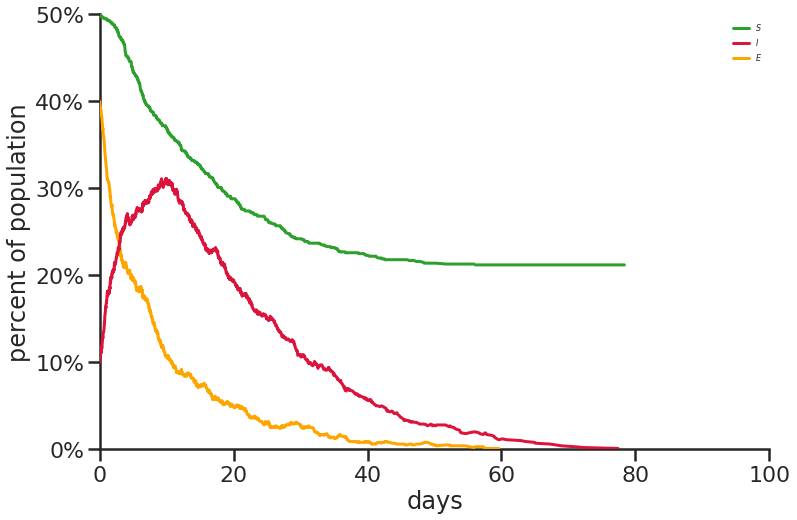

[1000, [[1, 1], [1, 13]], 4, 30]
t = 0.02
t = 10.01
t = 20.09
t = 30.01
t = 40.17
t = 50.18
t = 60.63
t = 70.58


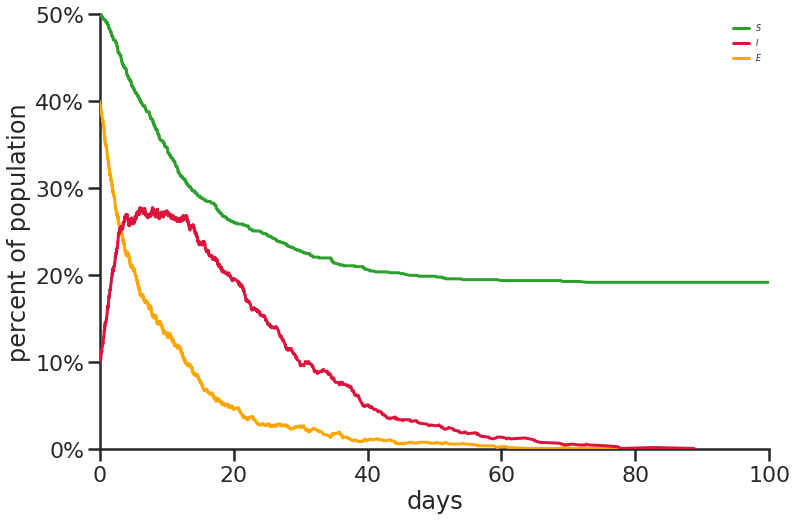

[1000, [[1, 1], [1, 13]], 5, 30]
t = 0.00
t = 10.01
t = 20.03
t = 30.09
t = 40.04
t = 50.27
t = 60.27
t = 70.19


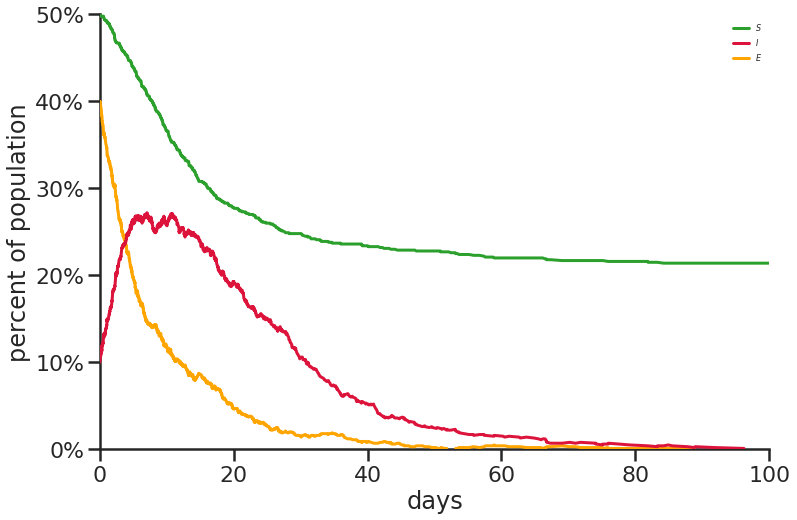

[1000, [[1, 1], [1, 13]], 6, 30]
t = 0.01
t = 10.02
t = 20.00
t = 30.20
t = 40.62
t = 50.04
t = 60.96
t = 90.22
t = 110.34


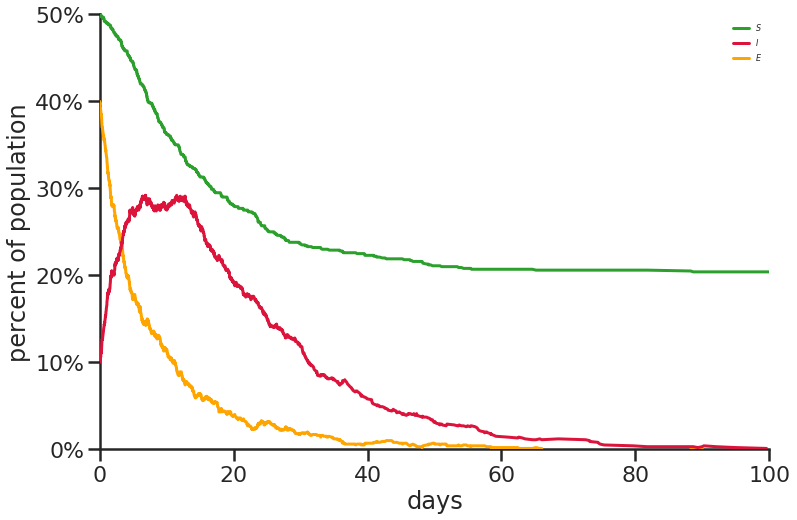

[1000, [[1, 1], [1, 17]], 1, 30]
t = 0.00
t = 10.04
t = 20.00
t = 30.05
t = 40.19
t = 50.06
t = 60.06
t = 70.58
t = 80.44
t = 90.53
t = 100.19


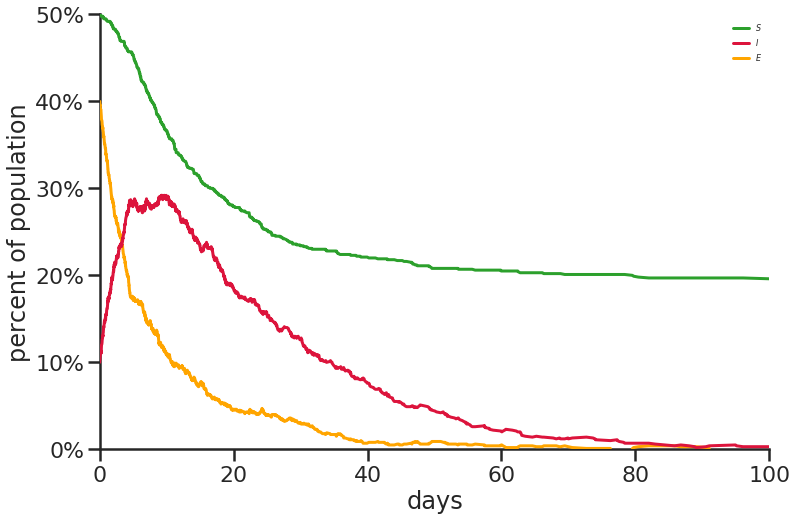

[1000, [[1, 1], [1, 17]], 2, 30]
t = 0.00
t = 10.12
t = 20.04
t = 30.09
t = 40.06
t = 50.06
t = 60.06
t = 70.28
t = 80.34
t = 90.16


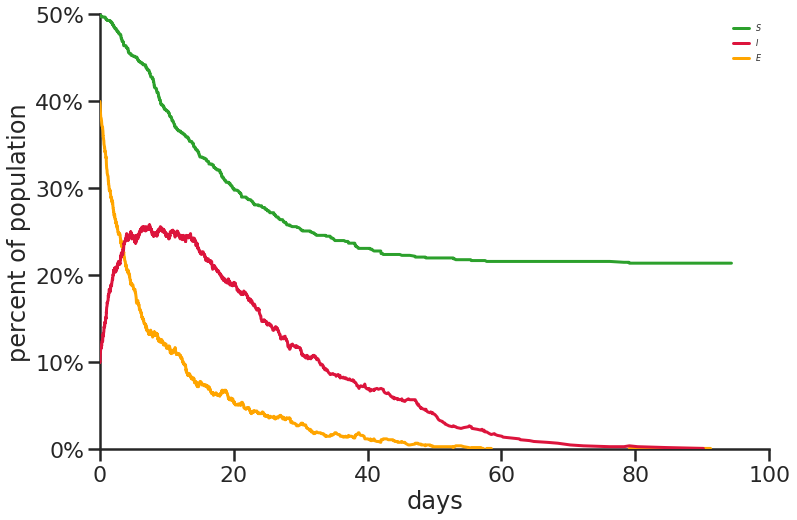

[1000, [[1, 1], [1, 17]], 3, 30]
t = 0.02
t = 10.00
t = 20.02
t = 30.06
t = 40.08
t = 50.30
t = 60.32
t = 70.48
t = 90.52


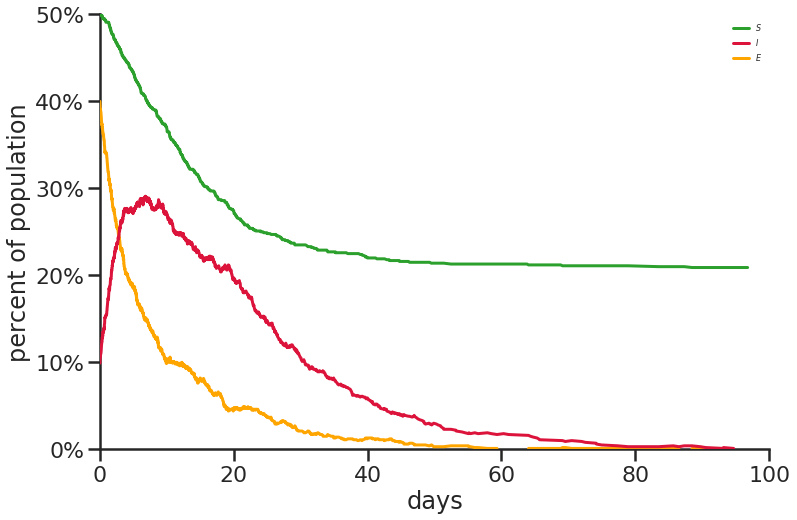

[1000, [[1, 1], [1, 17]], 4, 30]
t = 0.01
t = 10.00
t = 20.02
t = 30.12
t = 40.04
t = 50.37
t = 60.34
t = 70.12
t = 110.48


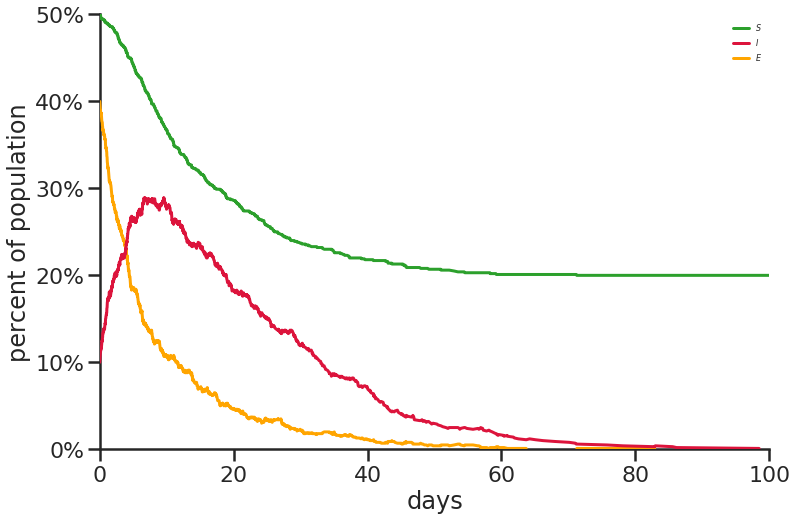

[1000, [[1, 1], [1, 17]], 5, 30]
t = 0.02
t = 10.00
t = 20.03
t = 30.05
t = 40.19
t = 50.31
t = 70.24


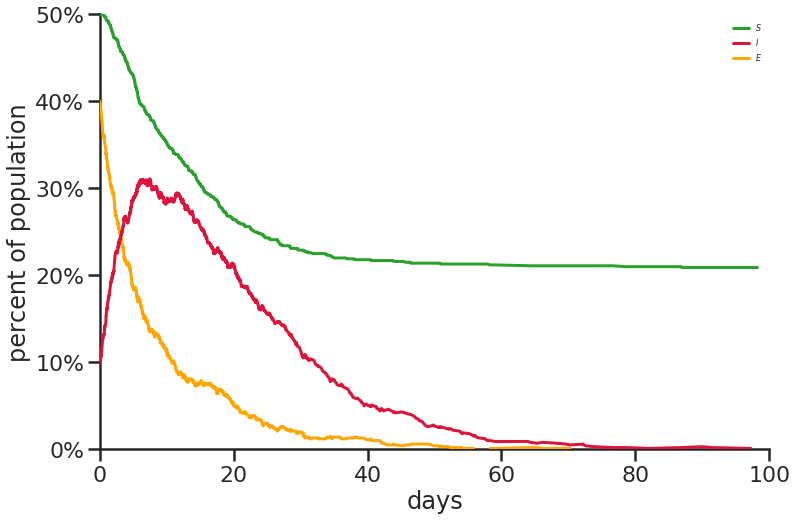

[1000, [[1, 1], [1, 17]], 6, 30]
t = 0.01
t = 10.05
t = 20.05
t = 30.13
t = 40.32
t = 50.00
t = 60.07


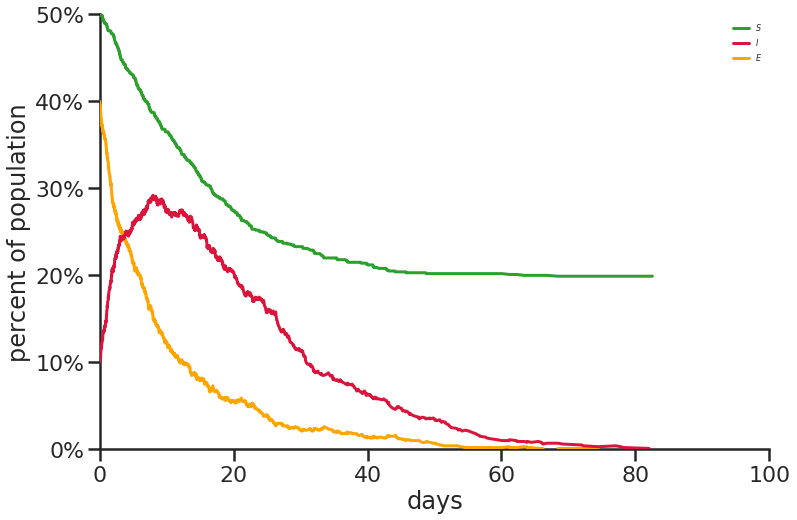

[1000, [[1, 1], [1, 21]], 1, 30]
t = 0.00
t = 10.01
t = 20.02
t = 30.07
t = 40.01
t = 50.11
t = 70.42
t = 80.15
t = 90.27


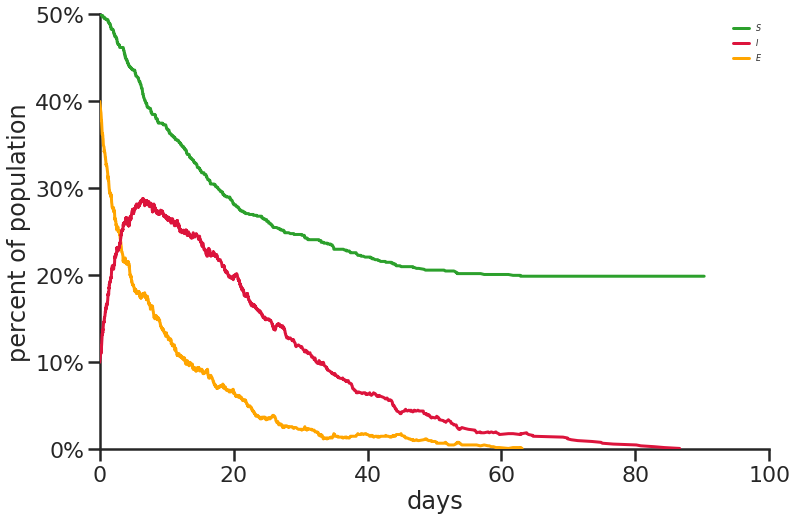

[1000, [[1, 1], [1, 21]], 2, 30]
t = 0.00
t = 10.00
t = 20.01
t = 30.02
t = 40.17
t = 50.68
t = 60.23
t = 70.14


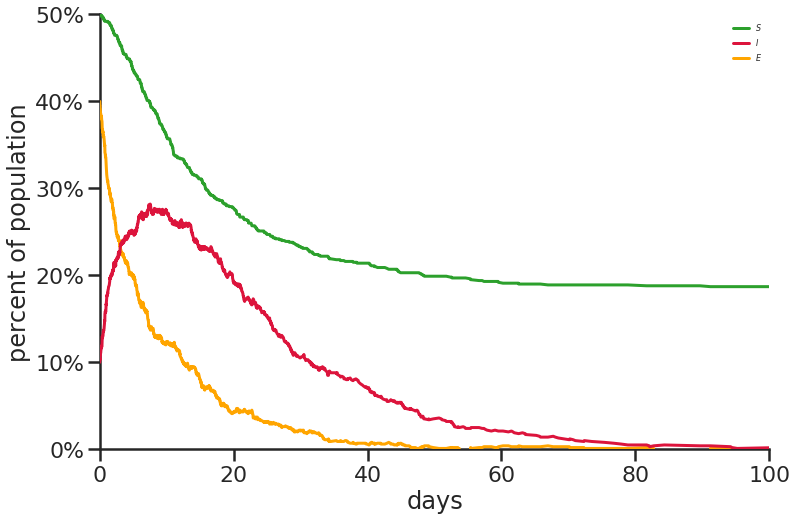

[1000, [[1, 1], [1, 21]], 3, 30]
t = 0.00
t = 10.01
t = 20.03
t = 30.01
t = 40.20
t = 50.02
t = 60.44
t = 70.50
t = 80.38
t = 130.20


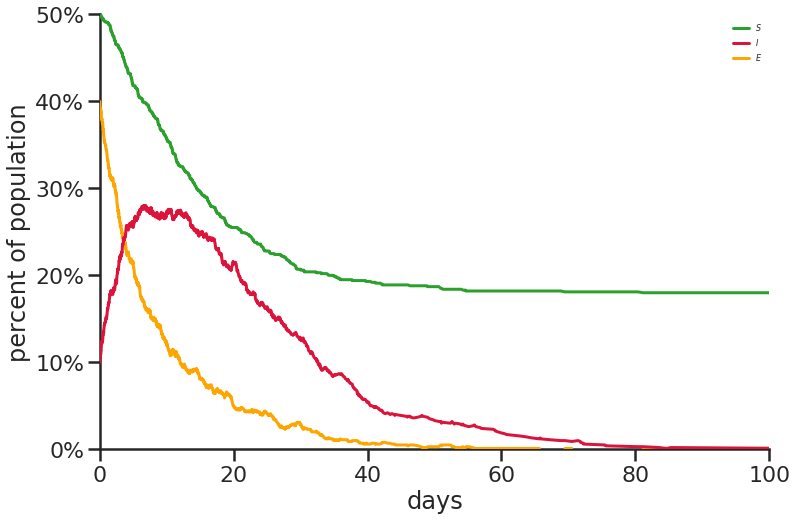

[1000, [[1, 1], [1, 21]], 4, 30]
t = 0.04
t = 10.04
t = 20.01
t = 30.26
t = 40.31
t = 50.06
t = 70.87
t = 90.41


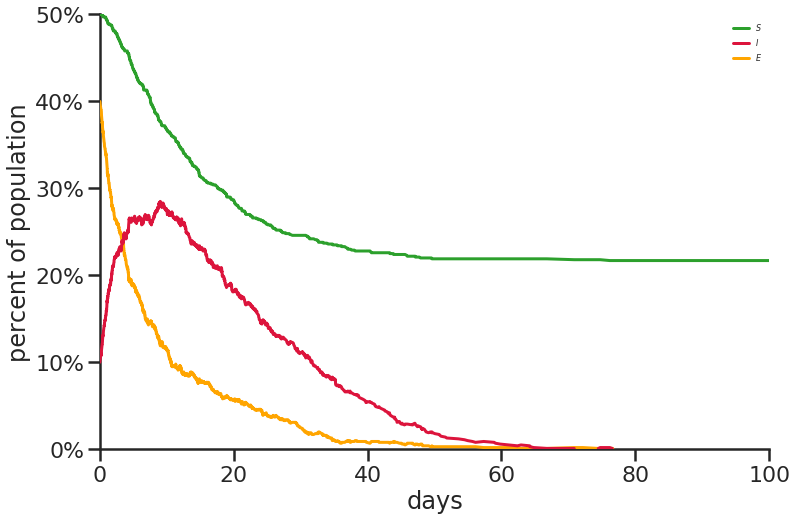

[1000, [[1, 1], [1, 21]], 5, 30]
t = 0.01
t = 10.03
t = 20.01
t = 30.06
t = 40.06
t = 50.44
t = 70.13
t = 80.99


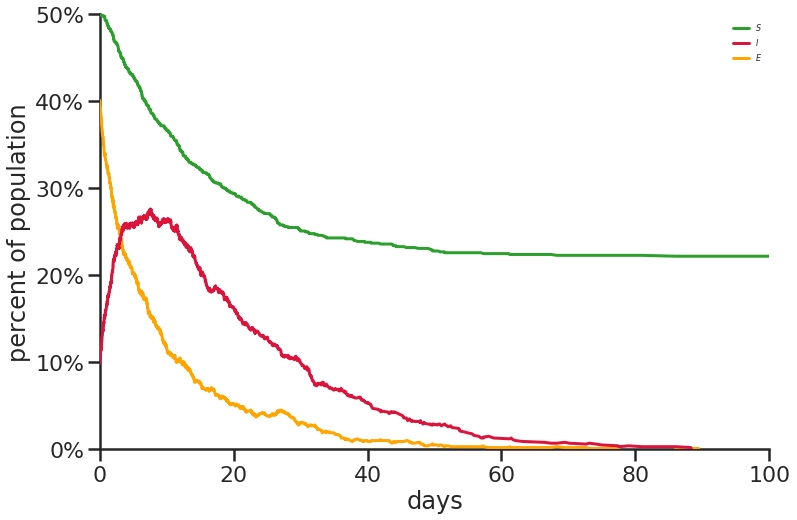

[1000, [[1, 1], [1, 21]], 6, 30]
t = 0.02
t = 10.01
t = 20.01
t = 30.10
t = 40.04
t = 50.52
t = 60.00
t = 70.17


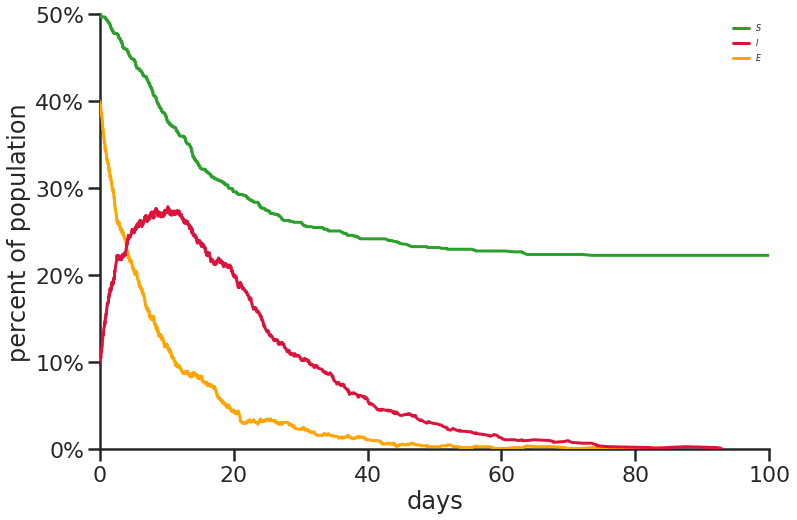

In [5]:
M =[]
D =[]
for l in range(5):
    M_el = []
    D_el = []
    for sdv in range(1, 7):
        peak, days = ipfn(1000,[[1,1],[1,(4*l+5)]], sdv, 30,l)
        M_el.append(peak)
        D_el.append(days)
    M.append(M_el)
    D.append(D_el)

In [6]:
max_val = pd.DataFrame(M, columns=['1','2','3','4','5','6'])
max_val

,1,2,3,4,5,6
0,0.302,0.275,0.307,0.287,0.272,0.293
1,0.273,0.311,0.280,0.288,0.268,0.296
2,0.288,0.292,0.311,0.278,0.272,0.292
3,0.292,0.258,0.291,0.289,0.311,0.292
4,0.288,0.282,0.280,0.285,0.276,0.279


In [7]:
max_val = max_val*100

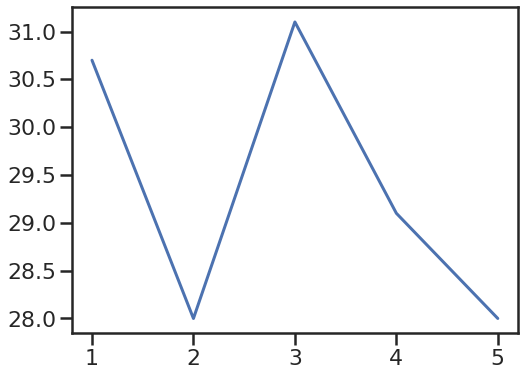

In [8]:
fig, axs = plt.subplots()